In [1]:
# import pandas as pd
# import numpy as np
# import sys
# import os
# import random
# from pathlib import Path
# import imageio
# import skimage
# import skimage.io
# import skimage.transform
# import matplotlib.pyplot as plt
# import tensorflow.keras as keras
# import seaborn as sns
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
# from plotly import tools
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# import scipy
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from keras import optimizers
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D, BatchNormalization
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import tensorflow as tf
# import tensorflow_addons as tfa
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt

In [3]:
print("GPUs Available: ", tf.test.gpu_device_name())

GPUs Available:  /device:GPU:0


In [4]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
filenames = os.listdir('../Datasets/dataset/Ungrouped/')

categories = []
for filename in filenames:
    category = filename.split(' ')[0]
    if category == 'a': 
        categories.append(0)
    elif category == 'b': 
        categories.append(1)
    elif category == 'ba':
        categories.append(2)
    elif category == 'be_bi':
        categories.append(3)
    elif category == 'bo_bu':
        categories.append(4)
    elif category == 'd_r': 
        categories.append(5)
    elif category == 'da':
        categories.append(6)
    elif category == 'de_di':
        categories.append(7)
    elif category == 'do_du':
        categories.append(8)
    elif category == 'e_i': 
        categories.append(9)
    elif category == 'g':
        categories.append(10)
    elif category == 'ga':
        categories.append(11)
    elif category == 'ge_gi':
        categories.append(12)
    elif category == 'go_gu': 
        categories.append(13)
    elif category == 'h':
        categories.append(14)
    elif category == 'ha':
        categories.append(15)
    elif category == 'he_hi':
        categories.append(16)
    elif category == 'ho_hu': 
        categories.append(17)
    elif category == 'k':
        categories.append(18)
    elif category == 'ka':
        categories.append(19)
    elif category == 'ke_ki':
        categories.append(20)
    elif category == 'ko_ku': 
        categories.append(21)
    elif category == 'l':
        categories.append(22)
    elif category == 'la':
        categories.append(23)
    elif category == 'le_li':
        categories.append(24)
    elif category == 'lo_lu': 
        categories.append(25)
    elif category == 'm':
        categories.append(26)
    elif category == 'ma':
        categories.append(27)
    elif category == 'me_mi':
        categories.append(28)
    elif category == 'mo_mu': 
        categories.append(29)
    elif category == 'n':
        categories.append(30)
    elif category == 'na':
        categories.append(31)
    elif category == 'ne_ni':
        categories.append(32)
    elif category == 'no_nu':
        categories.append(33)
    elif category == 'ng': 
        categories.append(34)
    elif category == 'nga':
        categories.append(35)
    elif category == 'nge_ngi':
        categories.append(36)
    elif category == 'ngo_ngu': 
        categories.append(37)
    elif category == 'o_u':
        categories.append(38)
    elif category == 'p':
        categories.append(39)
    elif category == 'pa':
        categories.append(40)
    elif category == 'pe_pi': 
        categories.append(41)
    elif category == 'po_pu':
        categories.append(42)
    elif category == 's':
        categories.append(43)
    elif category == 'sa':
        categories.append(44)
    elif category == 'se_si': 
        categories.append(45)
    elif category == 'so_su':
        categories.append(46)
    elif category == 't':
        categories.append(47)
    elif category == 'ta':
        categories.append(48)   
    elif category == 'te_ti': 
        categories.append(49)
    elif category == 'to_tu':
        categories.append(50)
    elif category == 'w':
        categories.append(51)
    elif category == 'wa':
        categories.append(52)
    elif category == 'we_wi': 
        categories.append(53)
    elif category == 'wo_wu':
        categories.append(54)
    elif category == 'y':
        categories.append(55)
    elif category == 'ya':
        categories.append(56)
    elif category == 'ye_yi': 
        categories.append(57)
    elif category == 'yo_yu':
        categories.append(58)
        
df = pd.DataFrame({'filename': filenames, 'character': categories})

In [6]:
df["character"] = df["character"].replace({ 0:'a',1:'b', 2:'ba',3:'bi',4:'bo',5:'d',6:'da',7:'di',8:'do',9:'e',10:'g',
                                         11:'ga',12:'gi',13:'gu',14:'h',15:'ha',16:'hi',17:'ho',18:'k',19:'ka',20:'ki',
                                         21:'ko',22:'l',23:'la',24:'li',25:'lu',26:'m',27:'ma',28:'mi',29:'mu',30:'n',
                                         31:'na',32:'ni',33:'no',34:'ng',35:'nga',36:'ngi',37:'ngu',38:'o',39:'p',40:'pa',
                                         41:'pi',42:'pu',43:'s',44:'sa',45:'si',46:'su',47:'t',48:'ta',49:'ti',50:'tu',
                                         51:'w',52:'wa',53:'wi',54:'wo',55:'y',56:'ya',57:'ye',58:'yo'})

In [7]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["character"])
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [8]:
TRAIN_PATH = "../Datasets/dataset/Ungrouped/"
BATCH_SIZE = 64
EPOCHS = 50

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  
    zoom_range =0.1,
    width_shift_range=0.1,  
    height_shift_range=0.1)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    TRAIN_PATH, 
    x_col='filename',
    y_col='character',
    target_size=(32,32),
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=BATCH_SIZE)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    TRAIN_PATH, 
    x_col='filename',
    y_col='character',
    target_size=(32,32),
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=BATCH_SIZE)

Found 47200 validated image filenames belonging to 59 classes.
Found 11800 validated image filenames belonging to 59 classes.


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, padding = 'Same', activation ='relu', input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2, strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size = 3, padding  = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, padding  = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2, strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size = 3, padding  = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, padding  = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, padding  = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2, strides = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(216, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(59, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [11]:
#callbacks
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.2, min_lr=0.00001)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
mc = ModelCheckpoint('BRM.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [12]:
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [13]:
history = model.fit(train_generator, validation_data=validation_generator,
                    validation_steps=total_validate/64,
                    steps_per_epoch=total_train/64, epochs= EPOCHS,
                    callbacks=[lr, es, mc, cb])

Epoch 1/50
737/737 [==============================] - 36s 46ms/step - loss: 3.7014 - accuracy: 0.0925 - val_loss: 1.8914 - val_accuracy: 0.4851

Epoch 00001: val_accuracy improved from -inf to 0.48508, saving model to BRM.h5
Epoch 2/50
737/737 [==============================] - 34s 46ms/step - loss: 2.1027 - accuracy: 0.3881 - val_loss: 0.6450 - val_accuracy: 0.8126

Epoch 00002: val_accuracy improved from 0.48508 to 0.81263, saving model to BRM.h5
Epoch 3/50
737/737 [==============================] - 38s 51ms/step - loss: 1.2578 - accuracy: 0.6102 - val_loss: 0.3333 - val_accuracy: 0.8955

Epoch 00003: val_accuracy improved from 0.81263 to 0.89551, saving model to BRM.h5
Epoch 4/50
737/737 [==============================] - 33s 45ms/step - loss: 0.8169 - accuracy: 0.7426 - val_loss: 0.2161 - val_accuracy: 0.9337

Epoch 00004: val_accuracy improved from 0.89551 to 0.93373, saving model to BRM.h5
Epoch 5/50
737/737 [==============================] - 33s 45ms/step - loss: 0.5753 - accura

737/737 [==============================] - 33s 45ms/step - loss: 0.0466 - accuracy: 0.9869 - val_loss: 0.0221 - val_accuracy: 0.9958

Epoch 00038: val_accuracy did not improve from 0.99585
Epoch 39/50
737/737 [==============================] - 33s 45ms/step - loss: 0.0456 - accuracy: 0.9869 - val_loss: 0.0216 - val_accuracy: 0.9956

Epoch 00039: val_accuracy did not improve from 0.99585
Epoch 40/50
737/737 [==============================] - 33s 45ms/step - loss: 0.0474 - accuracy: 0.9867 - val_loss: 0.0219 - val_accuracy: 0.9958

Epoch 00040: val_accuracy did not improve from 0.99585
Epoch 41/50
737/737 [==============================] - 33s 45ms/step - loss: 0.0466 - accuracy: 0.9867 - val_loss: 0.0210 - val_accuracy: 0.9958

Epoch 00041: val_accuracy did not improve from 0.99585
Epoch 00041: early stopping


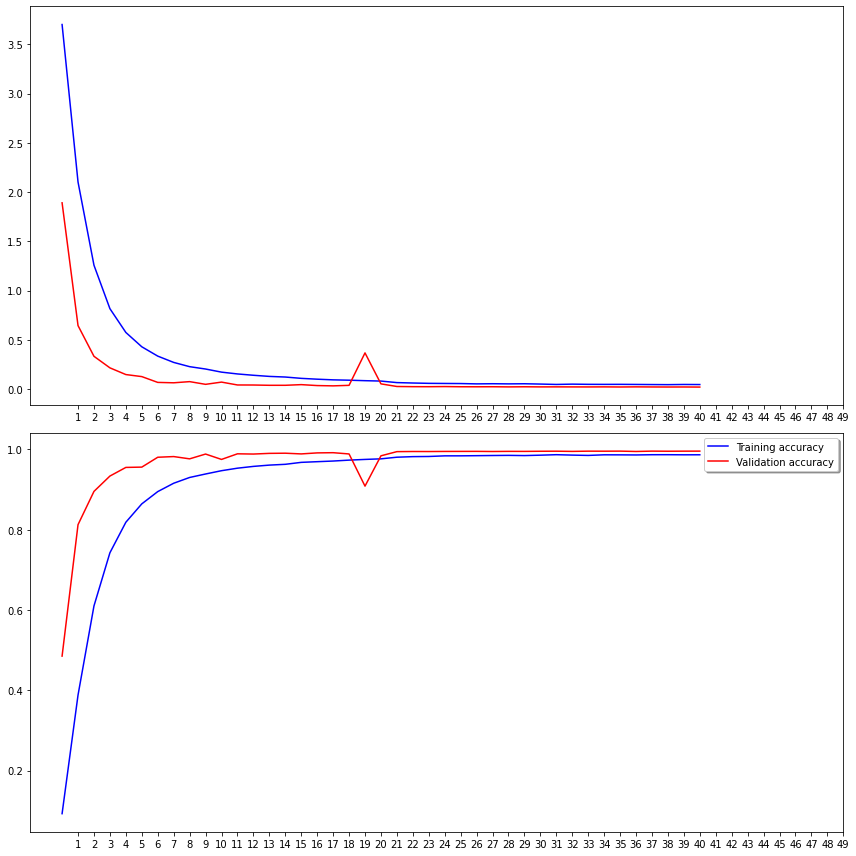

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, EPOCHS, 1))
# ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, EPOCHS, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [15]:
# test_filenames = os.listdir("C:/Users/Daniel/Desktop/dataset/Ungrouped/test/")
# TEST_PATH = "C:/Users/Daniel/Desktop/dataset/Ungrouped/test/"

# test_df = pd.DataFrame({
#     'filename': test_filenames
# })
# nb_samples = test_df.shape[0]

In [16]:
# test_gen = ImageDataGenerator(rescale=1./255)
# test_generator = test_gen.flow_from_dataframe(
#     test_df, 
#     TEST_PATH, 
#     x_col='filename',
#     y_col=None,
#     class_mode=None,
#     target_size=(32,32),
#     color_mode='grayscale',
#     batch_size=BATCH_SIZE,
#     shuffle=False)

In [17]:
# predict = model.predict(test_generator, steps=np.ceil(nb_samples/BATCH_SIZE))

In [18]:
# test_df['character'] = np.argmax(predict, axis=-1)

In [19]:
# label_map = dict((v,k) for k,v in train_generator.class_indices.items())
# test_df['character'] = test_df['character'].replace(label_map)

In [20]:
# test_df["character"] = test_df["character"].replace({ 0:'a',1:'b', 2:'ba',3:'bi',4:'bo',5:'d',6:'da',7:'di',8:'do',9:'e',10:'g',
#                                          11:'ga',12:'gi',13:'gu',14:'h',15:'ha',16:'hi',17:'ho',18:'k',19:'ka',20:'ki',
#                                          21:'ko',22:'l',23:'la',24:'li',25:'lu',26:'m',27:'ma',28:'mi',29:'mu',30:'n',
#                                          31:'na',32:'ni',33:'no',34:'ng',35:'nga',36:'ngi',37:'ngu',38:'o',39:'p',40:'pa',
#                                          41:'pi',42:'pu',43:'s',44:'sa',45:'si',46:'su',47:'t',48:'ta',49:'ti',50:'tu',
#                                          51:'w',52:'wa',53:'wi',54:'wo',55:'y',56:'ya',57:'ye',58:'yo'})

In [21]:
# test_df['character'].value_counts().plot.bar()

In [22]:
# from keras.preprocessing.image import ImageDataGenerator, load_img
# sample_test = test_df.head(18)
# sample_test.head()
# plt.figure(figsize=(12, 24))
# for index, row in sample_test.iterrows():
#     filename = row['filename']
#     category = row['character']
#     img = load_img(TEST_PATH+filename, target_size=(32,32))
#     plt.subplot(6, 3, index+1)
#     plt.imshow(img)
#     plt.xlabel(filename + '(' + "{}".format(category) + ')' )
# plt.tight_layout()
# plt.show()

In [23]:
# submission_df = test_df.copy()
# submission_df['id'] = submission_df['filename'].str.split('.').str[0]
# submission_df['label'] = submission_df['character']
# submission_df.drop(['filename', 'character'], axis=1, inplace=True)
# submission_df.to_csv('submission.csv', index=False)